In [1]:
#Importing Libraries
import pandas as pd
import random
import pickle
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten,BatchNormalization, Dropout, Lambda, Conv2D, MaxPool2D
from tensorflow.keras.utils import plot_model
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.preprocessing import LabelEncoder

In [2]:
pickle_in = open('X.pickle',"rb")
X = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open('y.pickle',"rb")
y = pickle.load(pickle_in)
pickle_in.close()

In [3]:
X.shape[1:]

(64, 64, 1)

In [11]:
# Define the model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(128, (4, 4), padding='same', activation='relu', input_shape=X.shape[1:]))

# Max Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

# 2nd Convolutional Layer
model.add(Conv2D(64, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

# 3rd Convolutional Layer
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

# 4th Convolutional Layer
model.add(Conv2D(16, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Fully Connected Dense Layer
model.add(Dense(512, activation='relu'))

# Dropout Layer
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(32, activation='softmax'))

# Compile the model
# tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer="Adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 128)    │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 64)     │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 32)     │        32,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 16)       │         8,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │        16,416 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 322,320 (1.23 MB)

 Trainable params: 322,320 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Train the model
history = model.fit(X, y, epochs=30, validation_split=0.15) 

Epoch 1/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - accuracy: 0.0694 - loss: 6.1136 - val_accuracy: 0.3057 - val_loss: 2.7450
Epoch 2/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.3248 - loss: 2.4536 - val_accuracy: 0.7241 - val_loss: 1.1948
Epoch 3/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.6634 - loss: 1.2083 - val_accuracy: 0.7747 - val_loss: 0.7227
Epoch 4/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.7809 - loss: 0.8051 - val_accuracy: 0.8690 - val_loss: 0.5153
Epoch 5/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - accuracy: 0.8493 - loss: 0.5738 - val_accuracy: 0.8851 - val_loss: 0.4522
Epoch 6/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.8843 - loss: 0.4298 - val_accuracy: 0.8943 - val_loss: 0.4249
Epoch 7/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - accuracy: 0.8902 - loss: 0.3810 - val_accuracy: 0.8828 - val_loss: 0.4052
Epoch 8/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.9071 - loss: 0.3309 - val_accuracy: 0.9172 - v

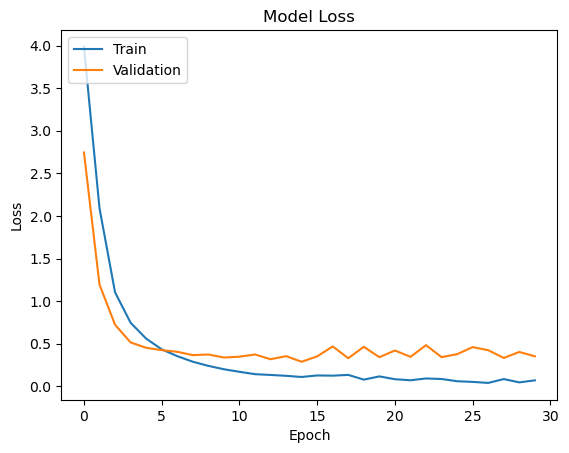

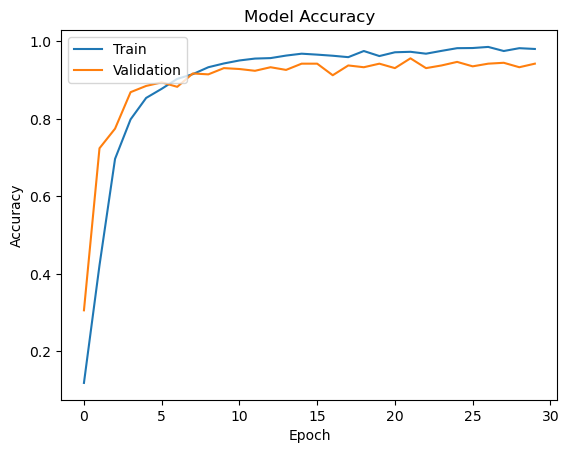

In [13]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [14]:
pickle_in = open('X_test.pickle',"rb")
X_test = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open('y_test.pickle',"rb")
y_test = pickle.load(pickle_in)
pickle_in.close()

In [15]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(X_test, y_test)

# Print the test loss and accuracy
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5479 - loss: 3.0750
Test Loss: 2.9871063232421875
Test Accuracy: 0.5426136255264282
